This sorce code is from '한 줄씩 따라 해보는 파이토치 딥러닝 프로젝트 모음집' book.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from matplotlib import pyplot as plt

In [2]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')

else:
  device = torch.device('cpu')

print('current device is ',device)

current device is  cuda:0


In [3]:
batch_size = 50
epoch_num = 15
learning_rate = 0.0001

In [4]:
#get MNIST data and set dataloader

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

print('number of training data: ', len(train_data))
print('number of test data: ', len(test_data))

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

number of training data:  60000
number of test data:  10000


<function matplotlib.pyplot.show>

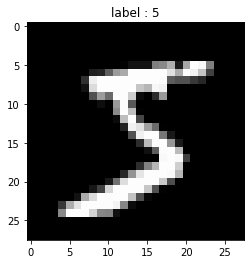

In [6]:
image, label = train_data[0]
plt.imshow(image.squeeze().numpy(), cmap = 'gray')
plt.title('label : %s' % label)
plt.show

In [7]:
# build CNN structure
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3, 1)
    self.conv2 = nn.Conv2d(32, 64, 3, 1)
    self.dropout1 = nn.Dropout(0.25)
    self.dropout2 = nn.Dropout(0.5)
    self.fc1 = nn.Linear(9216, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    x = self.dropout1(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = self.fc2(x)
    output = F.log_softmax(x, dim=1)
    return output

In [8]:
# set optimizer and loss function

model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [9]:
#model train

model.train()
i = 0
for epoch in range(epoch_num):
  for data, target in train_loader:
    data = data.to(device)
    target = target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if i% 1000 == 0:
      print('Train step: {}\t Loss: {:.3f}'.format(i, loss.item()))
    i += 1

Train step: 0	 Loss: 2.302
Train step: 1000	 Loss: 0.288
Train step: 2000	 Loss: 0.086
Train step: 3000	 Loss: 0.214
Train step: 4000	 Loss: 0.045
Train step: 5000	 Loss: 0.059
Train step: 6000	 Loss: 0.035
Train step: 7000	 Loss: 0.046
Train step: 8000	 Loss: 0.042
Train step: 9000	 Loss: 0.026
Train step: 10000	 Loss: 0.177
Train step: 11000	 Loss: 0.100
Train step: 12000	 Loss: 0.067
Train step: 13000	 Loss: 0.040
Train step: 14000	 Loss: 0.046
Train step: 15000	 Loss: 0.019
Train step: 16000	 Loss: 0.019
Train step: 17000	 Loss: 0.050


In [11]:
#model evaluation

model.eval()
correct = 0
for data, target in test_loader:
  data = data.to(device)
  target = target.to(device)
  output = model(data)
  prediction = output.data.max(1)[1]
  correct += prediction.eq(target.data).sum()

print('Test set: AccuracyL :{:.2f}%'.format(100*correct/len(test_loader.dataset)))



Test set: AccuracyL :99.11%
